# Perkenalan
pada final project ketiga ini, peserta diharapkan mampu membuat sebuah model yang dapat memprediksi keselamatan pasien dari penyakit jantung. data yang digunakan berasal dari kaggle yang berjumlah 13 atribut.

# Import Project

In [1]:
#melakukan import package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Data Loading

In [2]:
#import dataset
data_set = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
#Melihat 5 data teratas
data_set.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#Melihat column
data_set.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
#Melihat data lebih detail
data_set.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
#mengetahui type data dari data yang dipakai
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

In [7]:
#Melihat data yang kosong
data_set.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
target = ['DEATH_EVENT']
feature = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

# Eksplorasi Data

In [27]:
#melihat jumlah yang diabetes dan tidak
diabetes_count = data_set['diabetes'].value_counts()
diabetes_count

0    174
1    125
Name: diabetes, dtype: int64

[Text(0.5, 1.0, 'Distribusi Diabetes')]

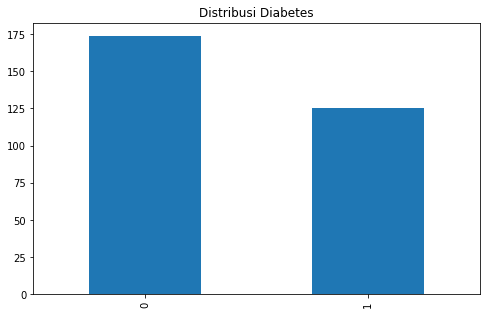

In [28]:
#membuat grafik column diabetes
plt.figure(figsize = (8, 5))
diabetes_count.plot(kind = "bar").set(title = "Distribusi Diabetes")

# Data Preprocessing

In [10]:
#split dataset train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set[feature],data_set[target], test_size=0.3, random_state=109)

# Pendefinisian Model

In [11]:
#Menggunakan random forest
rf = RandomForestClassifier(n_estimators=100)

In [12]:
#Membuat Gaussian Clasifier
#Menggunakan algoritma naive bayes karena naive bayes cukup sederhana,cepat akurat dan andal.
gnb = GaussianNB()

In [13]:
#Menggunakan DecisionTree
#karena 
dst = DecisionTreeClassifier()

# Pelatihan Model

In [14]:
#Menggunakan random forest
rf.fit(X_train,y_train)

<ipython-input-14-0a4a6e41ebce>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [15]:
#Menggunakan naive bayes
gnb.fit(X_train, y_train)

/home/lesmana/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

# Evaluasi Model

In [16]:
#Menggunakan Random Forest
y_pred_rf = rf.predict(X_test)

In [17]:
#Menggunakan NaiveBayes
y_pred_gnb = gnb.predict(X_test)
print(y_pred_gnb)

[1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1]


In [18]:
#Menggunakan DecisionTree
dst.fit(X_train,y_train)
y_pred_dst = dst.predict(X_test)
print(y_pred_dst)

[1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1]


In [19]:
#Akurasi menggunakan Random Forest
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy :  0.8333333333333334


In [20]:
#Akurasi menggunakan naive bayes
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_gnb))

Accuracy :  0.7777777777777778


In [21]:
#Akurasi Menggunakan DecisionTree
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred_dst))

Accuracy :  0.7666666666666667


In [22]:
#memeriksa precision dan recall model
#model precision dari Random Forest, NaiveBayes, dan DecissionTree
print("Precision : ", metrics.precision_score(y_test,y_pred_rf))
print("Precision : ", metrics.precision_score(y_test,y_pred_gnb))
print("Precision : ", metrics.precision_score(y_test,y_pred_dst))

Precision :  0.8125
Precision :  0.8571428571428571
Precision :  0.6944444444444444


# Model Inference

In [23]:
#menguji model dengan menginputkan data baru
test = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(1,-1)
y_pred_new = rf.predict(test)

In [24]:
print(y_pred_new)

[1]


# Kesimpulan
kesimpulan yang dapat diambil dari pengujian ketiga model diatas yaitu model yang paling akurat yaitu model dengan menggunakan random forest dengan tingkat akurasi sebesar 0.82 atau sekitar 82%, disusul dengan naive bayes sebesar 0.77 atau sekitar 77% dan decision tree sebesar 0.73 atau sekitar 73%